What is an Outlier?
A data point which is significantly far from other data points.
Inter-quartile Range(IQR)
Lower Boundary = Q1-1.5*IQR
Upper Boundary = Q3+1.5*IQR
plot using Boxplot

In [81]:
pip install --upgrade pandas


     ---------------------------------------- 10.7/10.7 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [9]:
df = pd.read_csv('mergedall.csv')

In [5]:
df.describe()

,Area(In Sq.Feet),Road,Price(Float),Bedroom,Bathroom,Floors
count,2710.000000,2710.000000,2.710000e+03,2710.000000,2710.000000,2710.000000
mean,2106.644107,15.084465,4.201011e+07,5.469373,4.026015,2.768210
std,2418.431581,4.653022,6.979467e+07,2.637364,1.834658,0.809886
min,85.562500,2.000000,1.300000e+05,1.000000,1.000000,1.000000
25%,1116.590625,13.000000,2.300000e+07,4.000000,3.000000,2.500000
50%,1437.450000,13.000000,3.100000e+07,5.000000,4.000000,2.500000
75%,2121.950000,17.500000,4.500000e+07,6.000000,5.000000,3.000000
max,68450.000000,50.000000,3.150000e+09,36.000000,34.000000,12.000000


In [8]:
df.shape

(2710, 9)

In [28]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set plot properties
plt.title('Correlation Matrix')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Display the plot
plt.show()


ValueError: could not convert string to float: 'Sunar gaun'

Boxplot

In [34]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
    

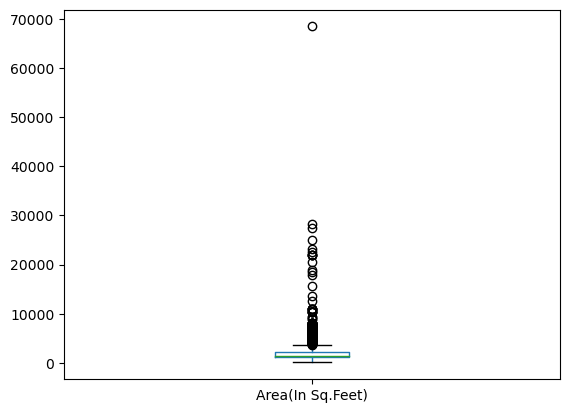

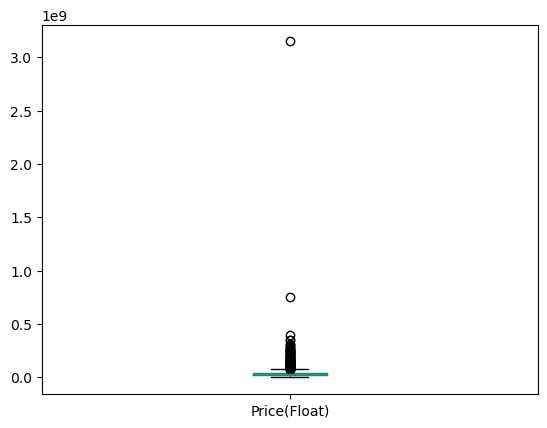

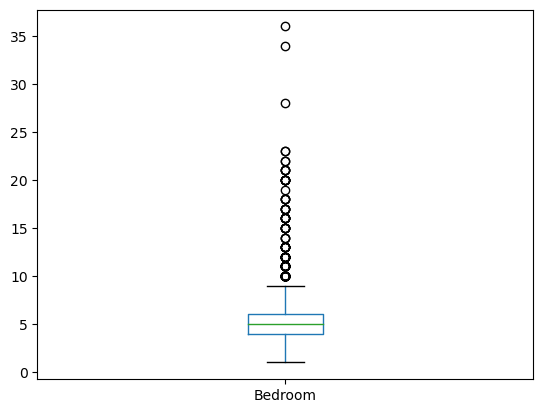

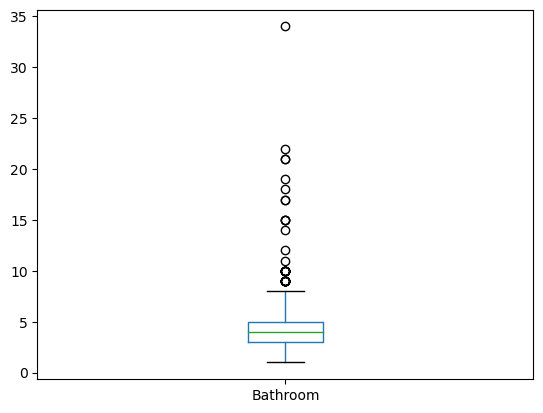

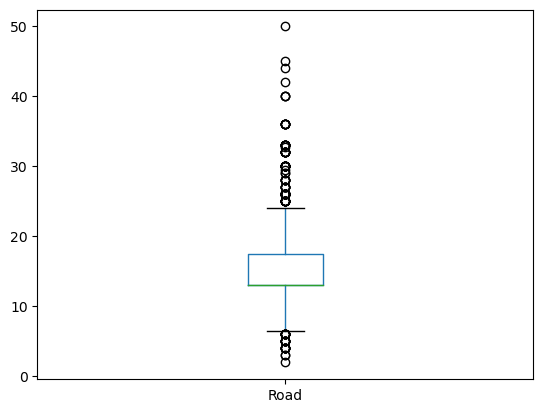

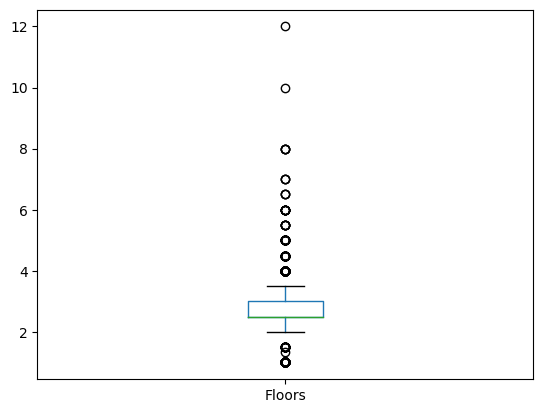

In [41]:
plot_boxplot(df,"Area(In Sq.Feet)")
plot_boxplot(df,"Price(Float)")
plot_boxplot(df,"Bedroom")
plot_boxplot(df,"Bathroom")
plot_boxplot(df,"Road")
plot_boxplot(df,"Floors")





In [43]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    ls = df.index[(df[ft]<lower_bound)| (df[ft]>upper_bound)]
    
    return ls
    

In [45]:
index_list = []
for feature in ['Price(Float)','Area(In Sq.Feet)','Bedroom','Bathroom','Road','Floors']:
    index_list.extend(outliers(df,feature))

In [47]:
len(index_list)

1195

In [48]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [49]:
df_cleaned = remove(df,index_list)

In [50]:
df_cleaned.shape

(1907, 9)

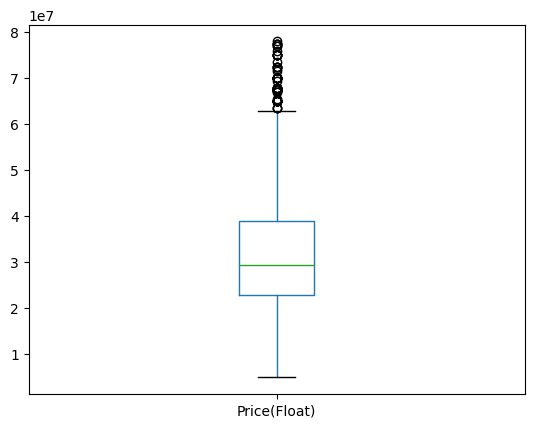

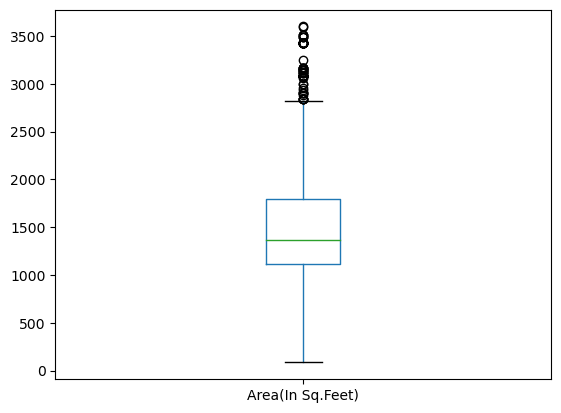

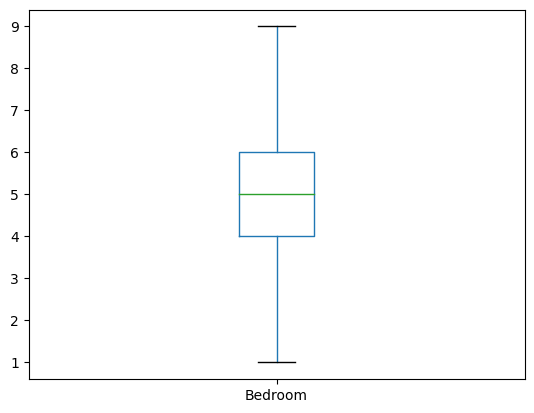

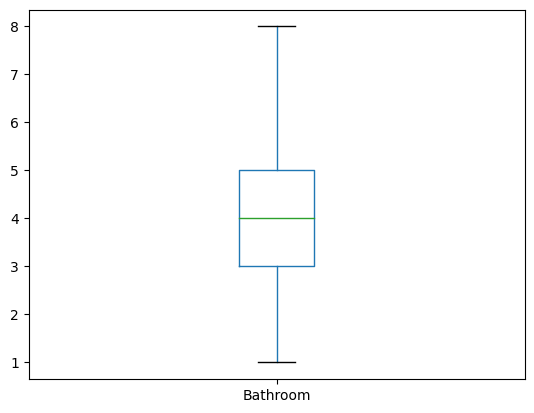

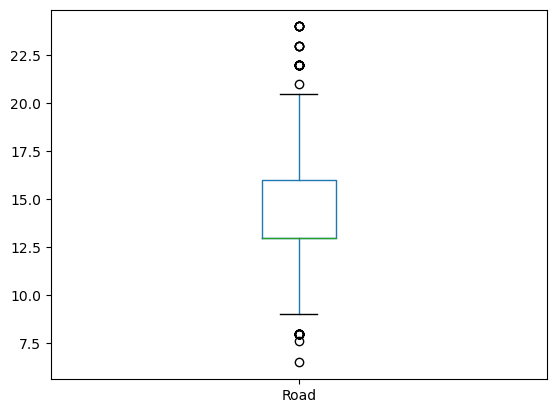

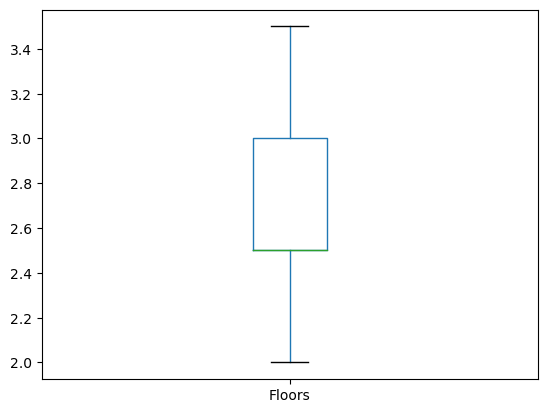

In [59]:
plot_boxplot(df_cleaned,'Price(Float)')
plot_boxplot(df_cleaned,'Area(In Sq.Feet)')
plot_boxplot(df_cleaned,'Bedroom')
plot_boxplot(df_cleaned,'Bathroom')
plot_boxplot(df_cleaned,'Road')
plot_boxplot(df_cleaned,'Floors')

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame

# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='BuGn')
plt.title('Correlation After Removing Outliers')
plt.show()

ValueError: could not convert string to float: 'Tinthana'

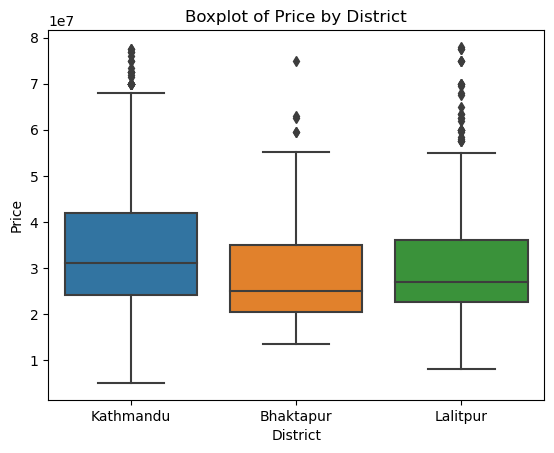

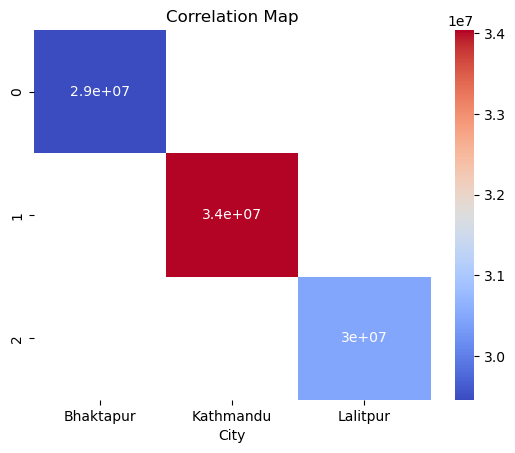

In [16]:
import seaborn as sns
sns.boxplot(x='City', y='Price(Float)', data=df_cleaned)
plt.xlabel('District')
plt.ylabel('Price')
plt.title('Boxplot of Price by District')
plt.show()

# Create a correlation map
correlation = df_cleaned.groupby('City')['Price(Float)'].mean().reset_index().pivot(columns='City', values='Price(Float)')
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()


In [86]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

Label_encoder = LabelEncoder()
nominal_cols = ['Face','Address','City']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(drop='first'),nominal_cols)],remainder='passthrough')

X_encoded = transformer.fit_transform(df_cleaned)
X = X_encoded.to_numpy()
# Assuming you have your data stored in a numpy array called 'X'
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative explained variance
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

AttributeError: to_numpy not found

In [73]:
len(df_cleaned['Address'].unique())

386

In [60]:
df_cleaned.describe()

,Area(In Sq.Feet),Road,Price(Float),Bedroom,Bathroom,Floors
count,1907.000000,1907.000000,1.907000e+03,1907.000000,1907.000000,1907.000000
mean,1576.289431,14.408641,3.274125e+07,5.098060,3.882276,2.692449
std,600.878449,3.225844,1.343602e+07,1.361027,1.153106,0.389979
min,85.562500,6.500000,5.000000e+06,1.000000,1.000000,2.000000
25%,1112.312500,13.000000,2.300000e+07,4.000000,3.000000,2.500000
50%,1369.000000,13.000000,2.950000e+07,5.000000,4.000000,2.500000
75%,1796.812500,16.000000,3.900000e+07,6.000000,5.000000,3.000000
max,3600.000000,24.000000,7.800000e+07,9.000000,8.000000,3.500000


In [2]:
df_cleaned = pd.read_csv("dataset_without_outliers.csv")

In [3]:
df_cleaned.shape

(1810, 9)

In [38]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


# Split the data into features (X) and target (y)
X = df.drop(columns=['Price(Float)'])
y = df['Price(Float)']

Label_encoder = LabelEncoder()
nominal_cols = ['Face','Address','City']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(drop='first'),nominal_cols)],remainder='passthrough')

X_encoded = transformer.fit_transform(X)
# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
 
# fit the regressor with x and y data
model = regressor.fit(X_encoded, y)

y_pred = model.predict(X_test)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'y_true' is the true target values and 'y_pred' is the predicted target values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 114657278349927.14
Root Mean Squared Error (RMSE): 10707813.892197004
Mean Absolute Error (MAE): 4347342.07562739
R-squared (R2): 0.8865057132548316


In [22]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


# Split the data into features (X) and target (y)
X = df_cleaned.drop(columns=['Price'])
y = df_cleaned['Price']

Label_encoder = LabelEncoder()
nominal_cols = ['Face','Address','City']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(drop='first'),nominal_cols)],remainder='passthrough')

X_encoded = transformer.fit_transform(X)
# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

regressor = RandomForestRegressor(n_estimators=450, random_state=0)
 
# fit the regressor with x and y data
model = regressor.fit(X_encoded, y)

y_pred = model.predict(X_test)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'y_true' is the true target values and 'y_pred' is the predicted target values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 8073888289153.953
Root Mean Squared Error (RMSE): 2841458.8311559176
Mean Absolute Error (MAE): 2002988.7332809106
R-squared (R2): 0.9476591507679111


In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Creating and training the gradient boost model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Assuming 'y_true' is the true target values and 'y_pred' is the predicted target values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error: 65451643376330.77
Mean Squared Error (MSE): 65451643376330.77
Root Mean Squared Error (RMSE): 8090218.994336975
Mean Absolute Error (MAE): 6050042.95956625
R-squared (R2): 0.5771023459214955


In [5]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Create the XGBoost regression model
xgb_reg = xgb.XGBRegressor()

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

RMSE: 7889653.90192925
Mean Squared Error (MSE): 62246638692227.445
Root Mean Squared Error (RMSE): 7889653.90192925
Mean Absolute Error (MAE): 5729298.099447514
R-squared (R2): 0.5978105954367102


In [4]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


svm_reg = SVR(kernel='linear')

# Train the model
svm_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_reg.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

RMSE: 8867998.194594976
Mean Squared Error (MSE): 78641391979339.75
Root Mean Squared Error (RMSE): 8867998.194594976
Mean Absolute Error (MAE): 6597230.464019683
R-squared (R2): 0.4918804407964231


In [74]:
df_cleaned.to_csv('NoOutliersDataSet.csv',index = False)

In [20]:
df_cleaned.shape

(1907, 9)

In [19]:
df_cleaned = pd.read_csv('NoOutliersDataSet.csv')